In [26]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt

In [27]:
class StepCounter:
    def __init__(self):
        self.steps = 0

    def increment(self):
        self.steps += 1

    def reset(self):
        self.steps = 0

def step_counter_decorator(func):
    def wrapper(*args, **kwargs):
        step_counter = kwargs.get('step_counter')
        if step_counter is None:
            step_counter = StepCounter()
            kwargs['step_counter'] = step_counter
        return func(*args, **kwargs)
    return wrapper

In [28]:
# Function to compute steps and estimate complexity
def compute_steps_and_complexity(func, inputs, trials=10):
    step_data = defaultdict(list)

    for inp in inputs:
        total_steps = 0
        for _ in range(trials):  # Perform multiple trials
            step_counter = StepCounter()
            step_counter.reset()
            
            # Call the function with step counter
            func(inp, step_counter=step_counter)
            
            total_steps += step_counter.steps
        
        avg_steps = total_steps / trials  # Take the average over trials
        step_data["input_size"].append(inp)
        step_data["steps"].append(avg_steps)
    
    # Plotting steps vs input size
    input_sizes = np.array(step_data["input_size"])
    steps = np.array(step_data["steps"])
    
    plt.plot(input_sizes, steps, label="Steps vs Input Size", marker="o")
    plt.xlabel("Input Size")
    plt.ylabel("Steps")
    plt.title("Empirical Time Complexity")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Estimate time complexity based on step data
    complexities = {
        "O(n)": input_sizes,
        "O(n^2)": input_sizes**2,
        "O(2^n)": 2**input_sizes,
        "O(n^3)": input_sizes**3,
        "O(log n)": np.log(input_sizes + 1e-10),
        "O(n log n)": input_sizes * np.log(input_sizes + 1e-10),
    }

    errors = {}
    for complexity_name, values in complexities.items():
        error = np.sum((steps - values)**2)
        errors[complexity_name] = error
    
    best_fit_complexity = min(errors, key=errors.get)
    return step_data, best_fit_complexity

In [29]:
@step_counter_decorator
def fat(n, step_counter=None):
    prod = 1
    for i in range(2, n+1):
        prod = prod * i
        step_counter.increment()
    return prod

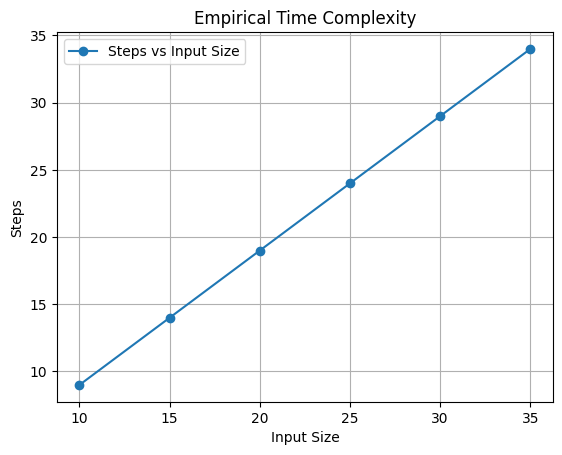

Estimated Time Complexity for Fatorial: O(n)


In [30]:
# Test with recursive Fibonacci
inputs = range(10, 40, 5)  # Example input sizes for Fibonacci
steps_data, complexity = compute_steps_and_complexity(fat, inputs, 1)
print(f"Estimated Time Complexity for Fatorial: {complexity}")

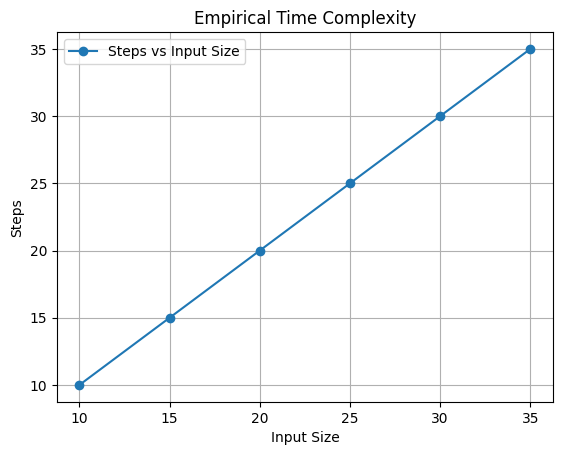

Estimated Time Complexity for Exponential: O(n)


In [31]:
b = 4
@step_counter_decorator
def exp1(n, step_counter=None):
    prod = 1
    for _ in range(n):
        prod = prod * b
        step_counter.increment()
    return prod

inputs = range(10, 40, 5)  # Example input sizes for exp
steps_data, complexity = compute_steps_and_complexity(exp1, inputs, 1)
print(f"Estimated Time Complexity for Exponential: {complexity}")

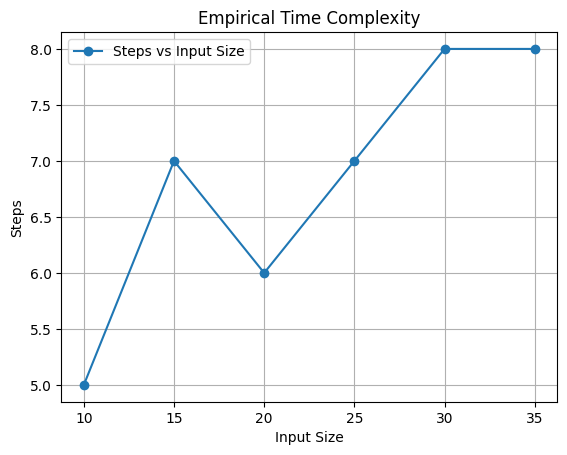

Estimated Time Complexity for Exponential: O(log n)


In [32]:

@step_counter_decorator
def exp2(n, step_counter=None):
    b = 4
    a = 1
    while n > 0:
        step_counter.increment()
        if not n%2 == 0:
            a = a*b
            n = n-1
        else:
            b = b*b
            n = n/2
    return a

inputs = range(10, 40, 5)  # Example input sizes for exp
steps_data, complexity = compute_steps_and_complexity(exp2, inputs, 1)
print(f"Estimated Time Complexity for Exponential: {complexity}")

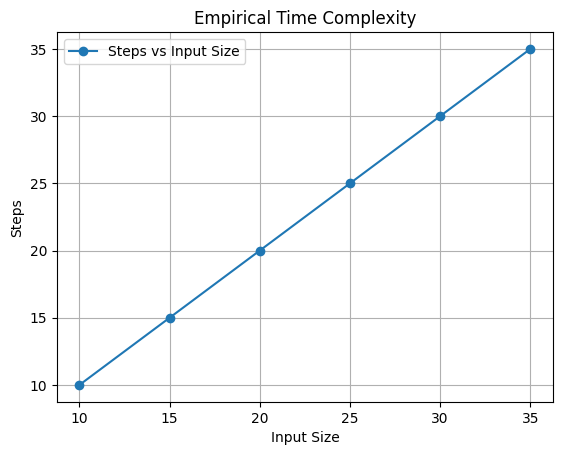

Estimated Time Complexity for Fibonacci: O(n)


In [33]:
@step_counter_decorator
def fib1(n, step_counter=None):
    a, b = 1, 0
    for _ in range(n):
        a, b = a + b, a
        step_counter.increment()
    return b

inputs = range(10, 40, 5)  # Example input sizes for Fibonacci
steps_data, complexity = compute_steps_and_complexity(fib1, inputs, 1)
print(f"Estimated Time Complexity for Fibonacci: {complexity}")

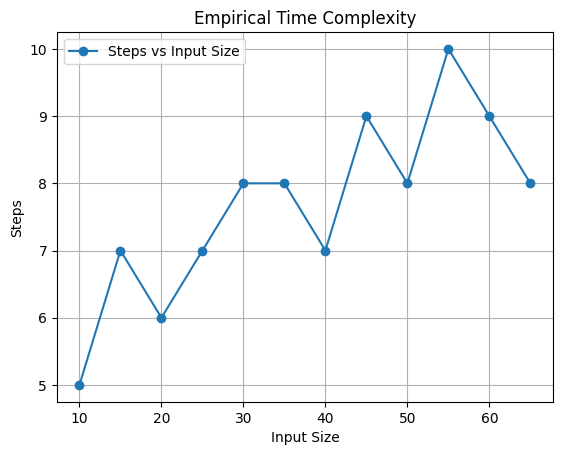

Estimated Time Complexity for Fibonacci: O(log n)


In [35]:
@step_counter_decorator
def fib2(n, step_counter=None):
    a = 1
    b = 0
    p = 0
    q = 1
    cont = n
    while (cont>0):
        step_counter.increment()
        if cont % 2 == 0:
            p, q = q**2 + p**2, q**2 + 2*p*q
            cont = cont/2
        else:
            a, b = b*q + a*q + a*p, b*p + a*q
            cont = cont - 1
    return b

inputs = range(10, 70, 5)  # Example input sizes for Fibonacci
steps_data, complexity = compute_steps_and_complexity(fib2, inputs, 1)
print(f"Estimated Time Complexity for Fibonacci: {complexity}")